## Ejercicios Seaborn

In [4]:
import numpy as np
import pandas as pd

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")

numpy==2.2.0
pandas==2.2.3
matplotlib==3.10.0
seaborn==0.13.2


### Ejercicio 0:
- Lee el archivo **`pokemon.csv`** y guardalo en la variable **`df`**.

In [6]:
df = pd.read_csv("Pokemon.csv")

In [7]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Ejercicio 1:
- Haz un diagrama de barras con el número de pokémons en cada generación.

<Axes: xlabel='Generation', ylabel='count'>

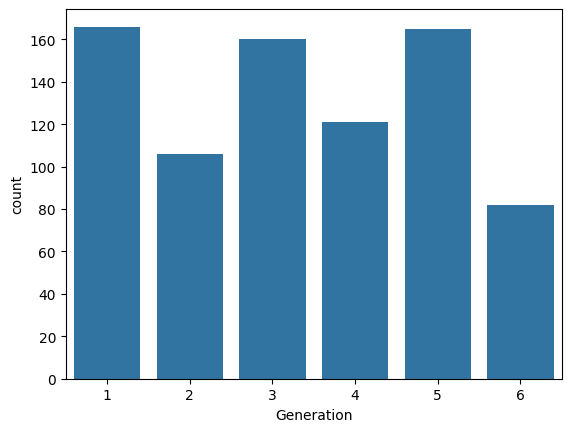

In [9]:
sns.countplot(df, x="Generation")

### Ejercicio 2:
- Representar la frecuencia de pokémons por tipo 1 en un gráfico de barras.

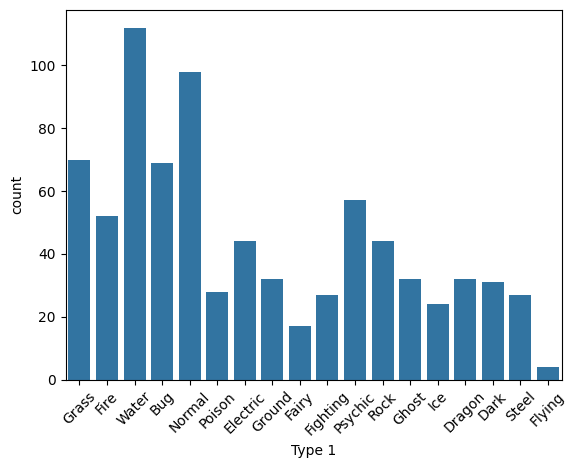

In [10]:
sns.countplot(df, x="Type 1")
plt.xticks(rotation=45);

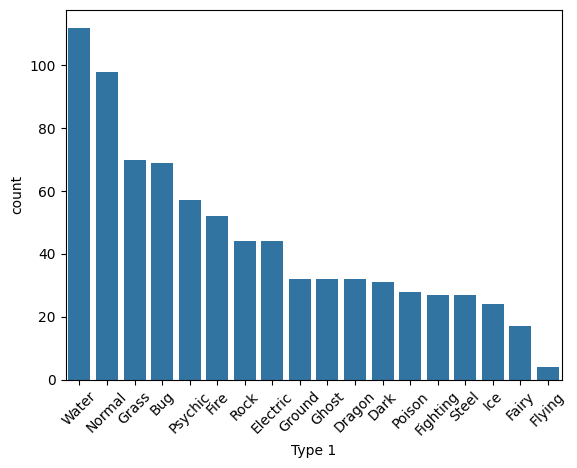

In [11]:
#con orden descendente
sorted_types = df["Type 1"].value_counts().index
sns.countplot(df, x="Type 1", order=sorted_types)
plt.xticks(rotation=45);

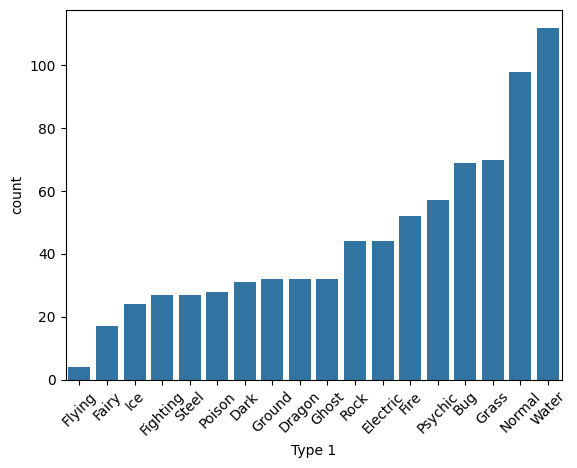

In [12]:
#con orden ascendente
# sorted_types = df["Type 1"].value_counts(ascending=True).index
sns.countplot(df, x="Type 1", order=df["Type 1"].value_counts(ascending=True).index)
plt.xticks(rotation=45);

### Ejercicio 3:
- Haz un diagrama de barras con el número de pokémons tipo 1 igual a "Grass" y "Fire".

<Axes: xlabel='Type 1', ylabel='count'>

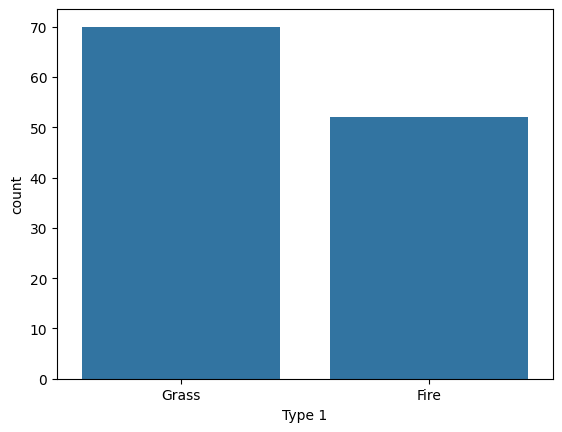

In [13]:
#filtro = df["Type 1"] == "Grass" | df["Type 1"] == "Fire" 
filtro = df["Type 1"].isin(["Grass", "Fire"])
sns.countplot(x= df[filtro]["Type 1"])

### Ejercicio 4:
- Haz un histograma con los puntos de salud HP de los pokémons, utiliza el color verde.
- Dibuja una línea vertical magenta que represente el promedio.

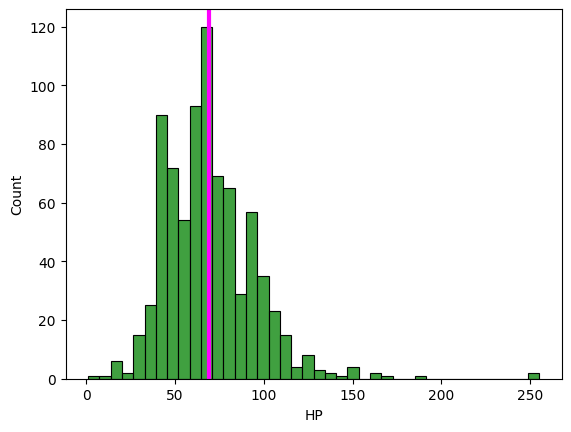

In [14]:
media = df["HP"].mean()
sns.histplot(df, x="HP", color= "green")
plt.axvline(media, color="magenta", linewidth = 3)

### Ejercicio 5:
-  Haz un histograma con la frecuencia de pokémons por rapidez (Speed).
-  Dibuja una línea vertical magenta que corresponda con la mediana.
-  Dibuja unas líneas verticales discontinuas de color magenta que correspondan con los cuartiles Q1 y Q3.

<Axes: xlabel='Speed', ylabel='Count'>

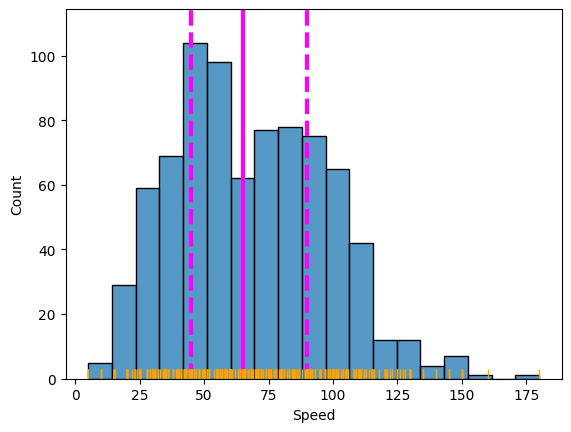

In [15]:

sns.histplot(df["Speed"])
plt.axvline(df["Speed"].median(), color="magenta", linewidth = 3)
plt.axvline(df["Speed"].quantile(0.25), color="magenta", linewidth = 3, linestyle="--")
plt.axvline(df["Speed"].quantile(0.75), color="magenta", linewidth = 3, linestyle="--")
sns.rugplot(df["Speed"], color="orange")

### Ejercicio 6:
- Haz un histograma con los puntos de salud (HP) de los pokémons (Type 1) = "Fire".

<Axes: xlabel='HP', ylabel='Count'>

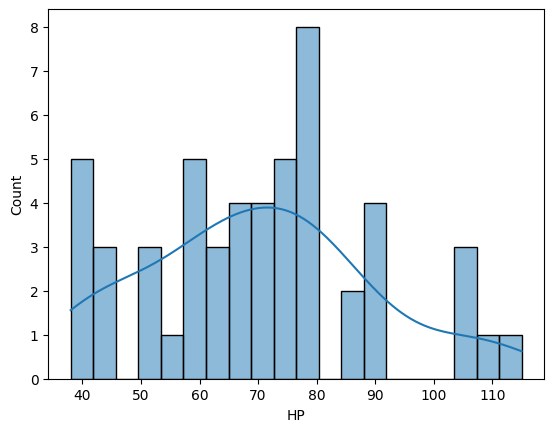

In [16]:
filtro = df["Type 1"] == "Fire"
sns.histplot(df, x=df[filtro]["HP"], kde=True, bins=20)

### Ejercicio 7:
- Haz un scatter plot y un scatter hex plot con los valores de "Attack" y "Defense"de los pokémons.

<Axes: xlabel='Attack', ylabel='Defense'>

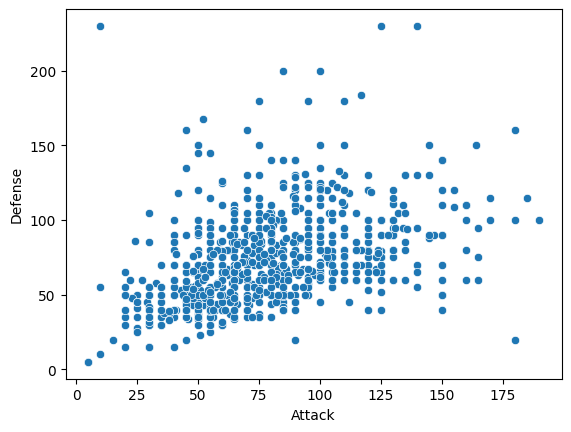

In [17]:
sns.scatterplot(df, x="Attack", y="Defense")

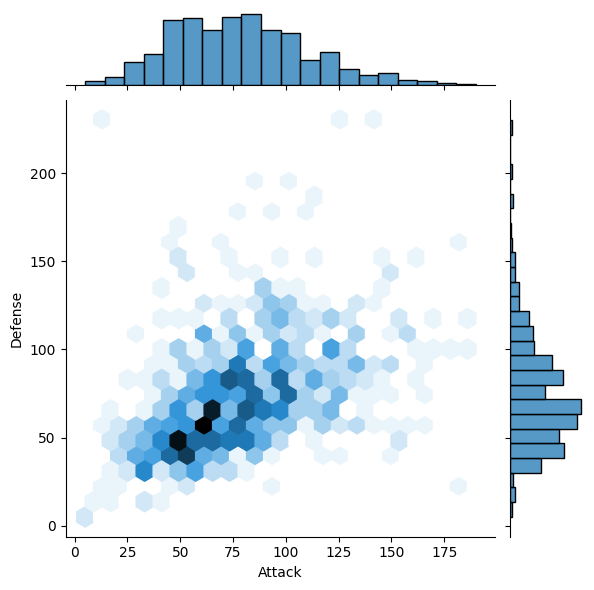

In [18]:
sns.jointplot(df, x="Attack", y="Defense", kind="hex")

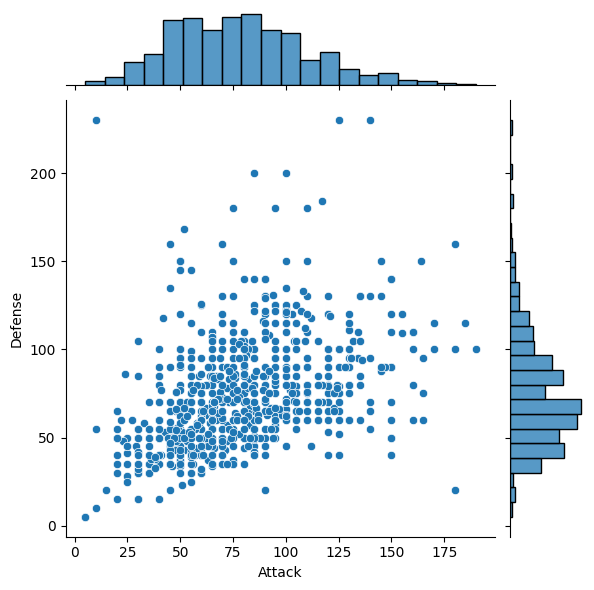

In [19]:
sns.jointplot(df, x="Attack", y="Defense")

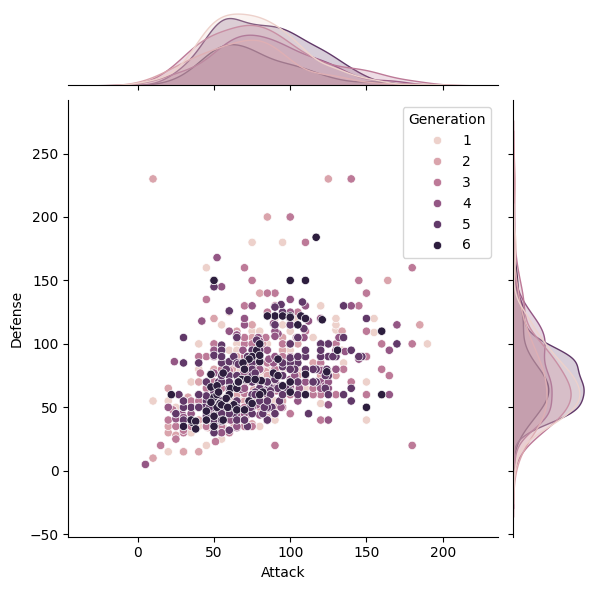

In [20]:
sns.jointplot(df, x="Attack", y="Defense", hue="Generation")

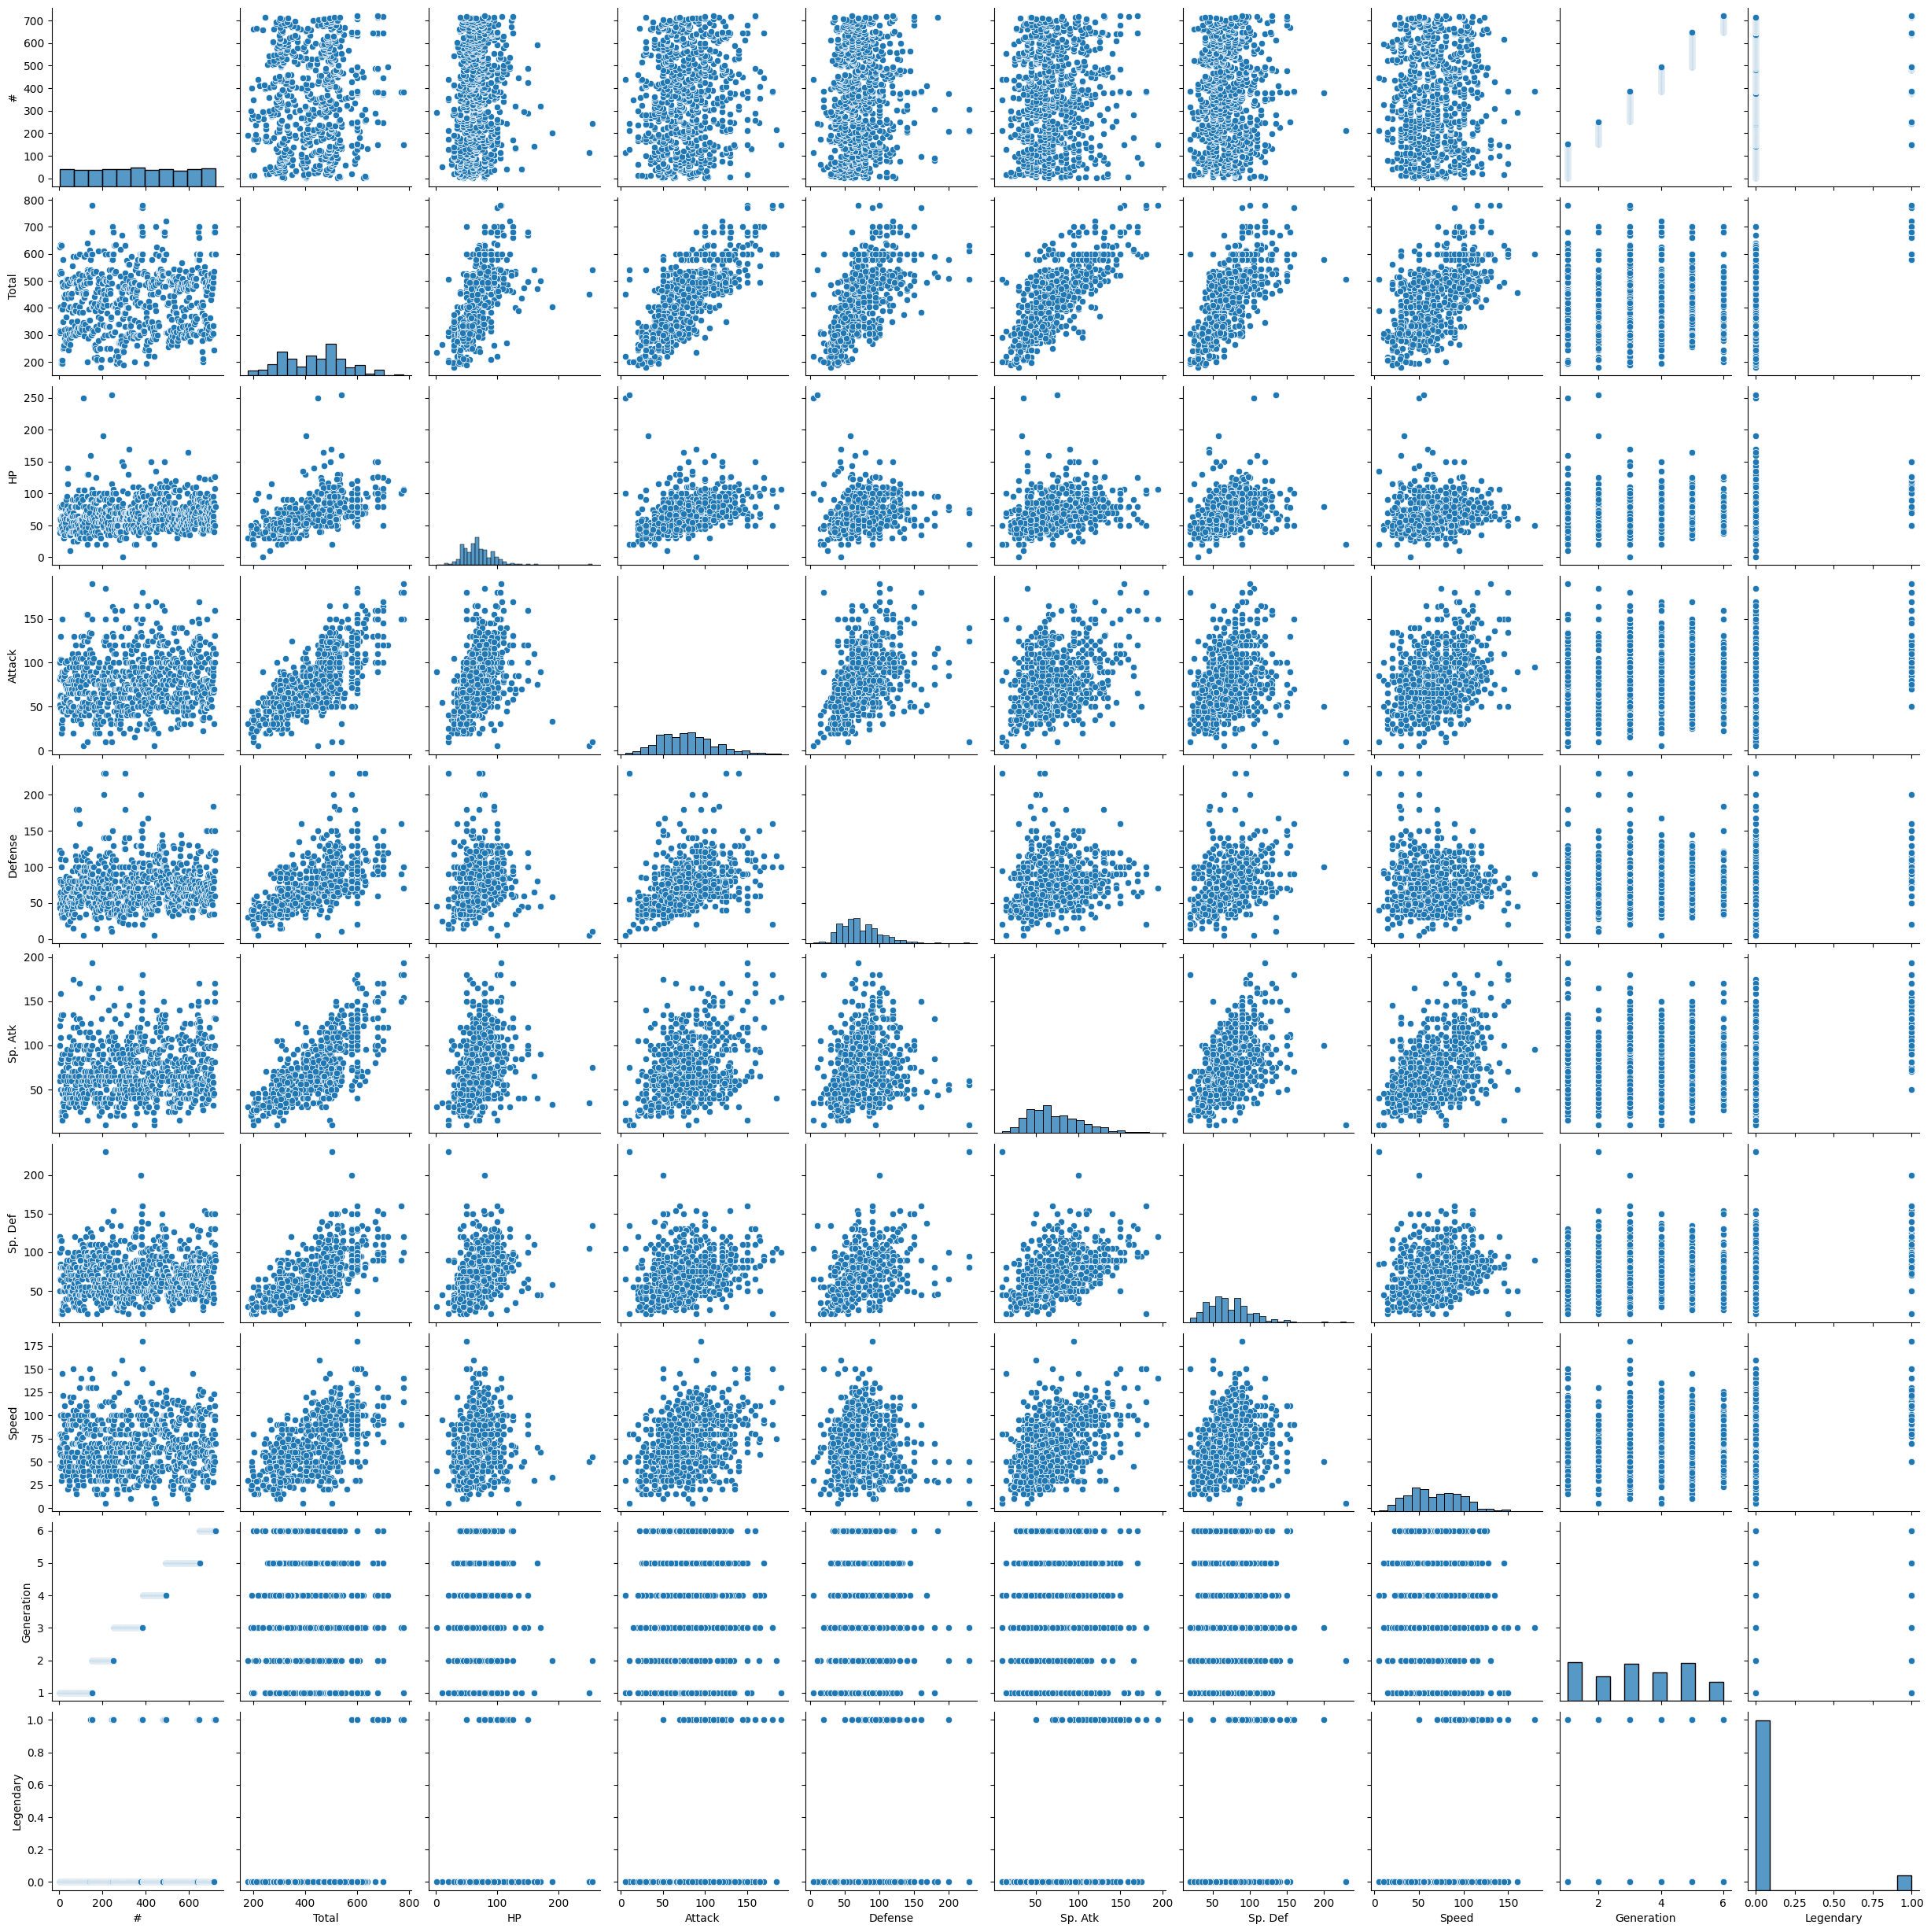

In [21]:
# alternativa para mostrar todos los scatterplots de todas las combinaciones dos a dos: 
# muy costoso, cuidado!!!
sns.pairplot(df)

### Ejercicio 8:
- Haz un scatter hex plot con los valores de "Attack" y "Defense"de los pokémons tipo "Water" y "Fire".

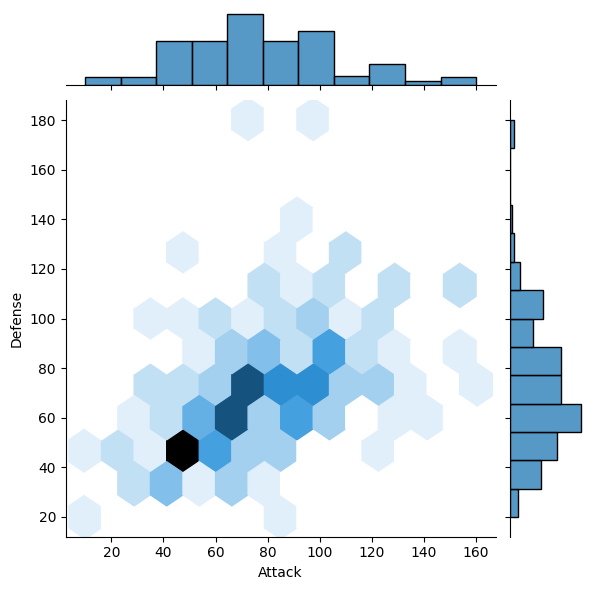

In [22]:
filtro = df["Type 1"].isin(["Water", "Fire"])
sns.jointplot(df[filtro], x="Attack", y="Defense", kind="hex")


### Ejercicio 9:
- Haz un KDE plot con la salud y el ataque de los pokémons.

<Axes: xlabel='HP', ylabel='Attack'>

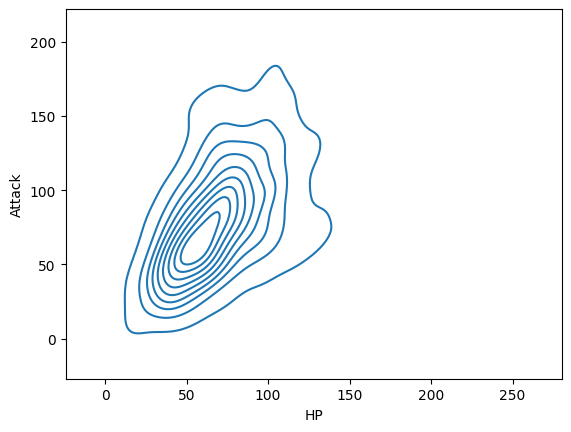

In [23]:
sns.kdeplot(df, x="HP", y="Attack")

<Axes: xlabel='HP', ylabel='Attack'>

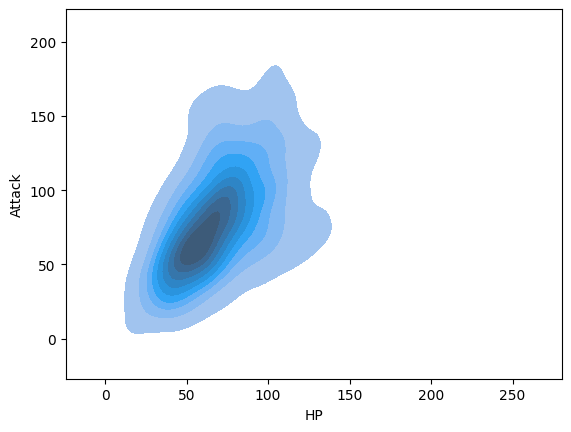

In [24]:
sns.kdeplot(df, x="HP", y="Attack", fill=True)

<Axes: xlabel='HP', ylabel='Attack'>

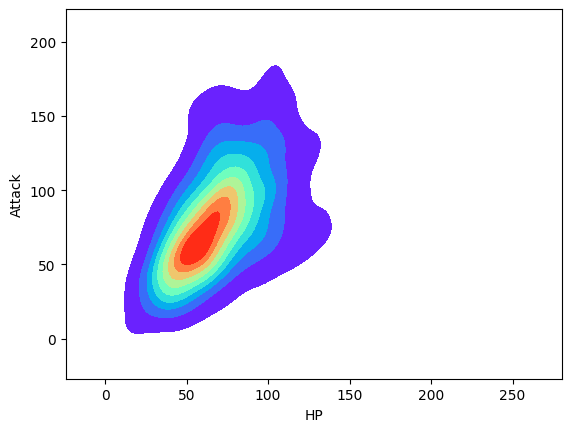

In [25]:
sns.kdeplot(df, x="HP", y="Attack", cmap="rainbow", fill=True)

<Axes: xlabel='HP', ylabel='Attack'>

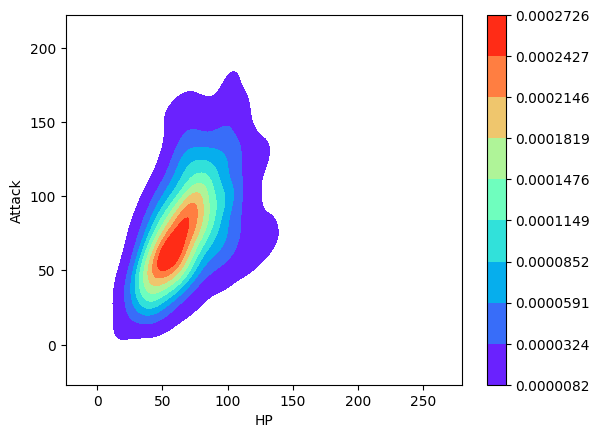

In [26]:
sns.kdeplot(df, x="HP", y="Attack", cmap="rainbow", fill=True, cbar=True)

### Ejercicio 10:
- Haz una grafica de caja con el ataque de los pokémons legendarios y no legendarios.

<Axes: xlabel='Legendary', ylabel='Attack'>

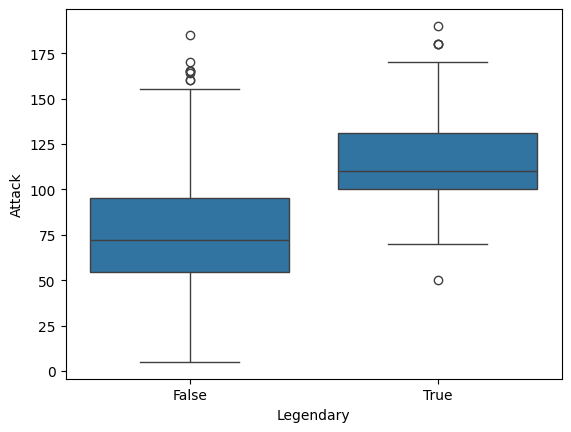

In [27]:
sns.boxplot(df, x="Legendary", y="Attack")

<Axes: xlabel='Attack'>

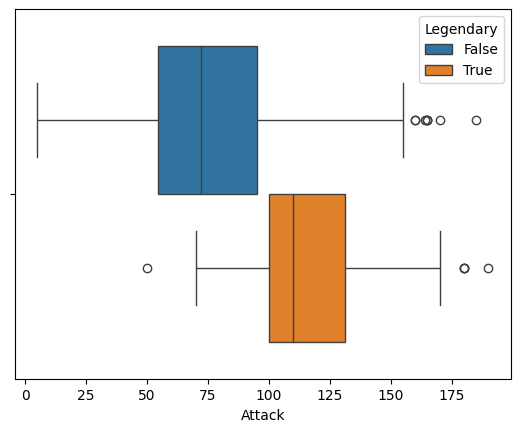

In [28]:
sns.boxplot(df, x=df["Attack"], hue=df["Legendary"])

<Axes: xlabel='Attack'>

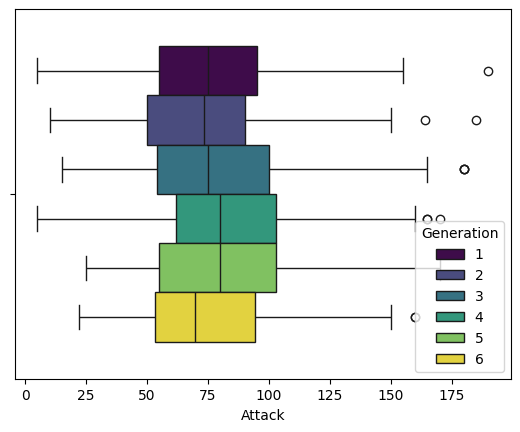

In [ ]:
sns.boxplot(x=df["Attack"], hue=df["Generation"], palette="viridis")

* Con paleta de colores personalizada

<Axes: xlabel='Attack'>

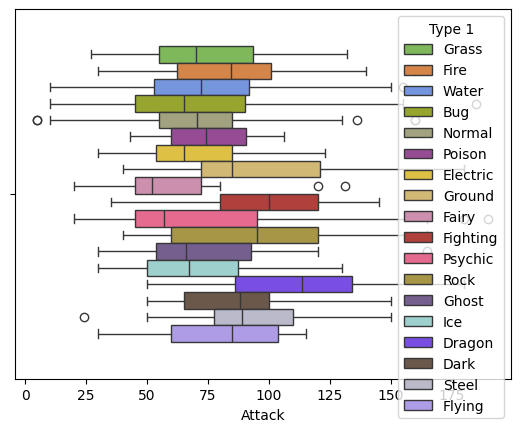

In [33]:
pokemon_colors = {
    "Normal": "#A8A77A",
    "Fire": "#EE8130",
    "Water": "#6390F0",
    "Electric": "#F7D02C",
    "Grass": "#7AC74C",
    "Ice": "#96D9D6",
    "Fighting": "#C22E28",
    "Poison": "#A33EA1",
    "Ground": "#E2BF65",
    "Flying": "#A98FF3",
    "Psychic": "#F95587",
    "Bug": "#A6B91A",
    "Rock": "#B6A136",
    "Ghost": "#735797",
    "Dragon": "#6F35FC",
    "Dark": "#705746",
    "Steel": "#B7B7CE",
    "Fairy": "#D685AD"
}

sns.boxplot(x=df["Attack"], hue=df["Type 1"], palette=pokemon_colors)

### Ejercicio 11:
- Haz una grafica de violin con el ataque de los pokémons legendarios y no legendarios.

<Axes: xlabel='Legendary', ylabel='Attack'>

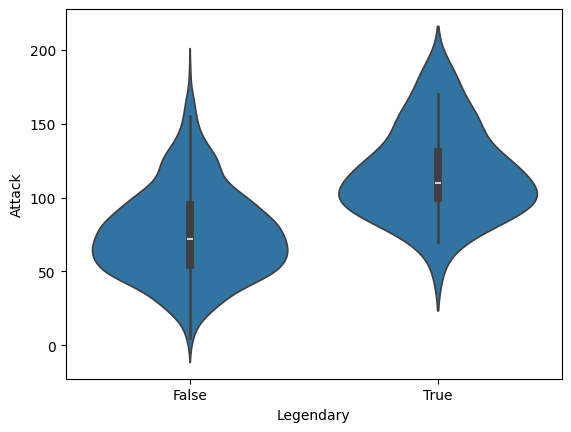

In [ ]:
sns.violinplot(df, x="Legendary", y="Attack")

<Axes: xlabel='Legendary', ylabel='Attack'>

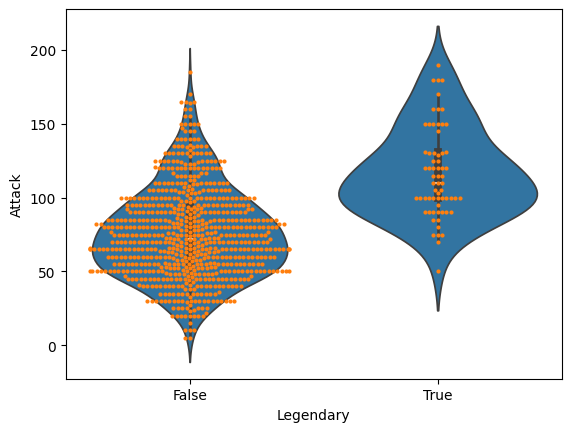

In [ ]:
sns.violinplot(df, x="Legendary", y="Attack")
sns.swarmplot(df, x="Legendary", y="Attack", size=3)# size=3 para que quepan todos los puntos

### Ejercicio 12:
- Haz un pairplot y compara los puntos de salud (HP), el ataque y la defensa de los pokémons.

### Ejercicio 13:
- Haz boxplots de la variable 'Total' distiguiendo por generación y entre legendarios y no legendarios.

### Ejercicio 14:
- Haz un heatmap para comparar la correlación entre salud, ataque, ataque especial, defensa, defensa especial y velocidad.

### Ejercicio 15:
- Encontrar los 5 mejores pokémons con respecto a la columna "Total", del tipo "Electric", "Fire", "Water" y comparar su salud, ataque, defensa y velocidad en un mapa de calor.

### Ejercicio 16:
- Usando FacetGrid obtén un KDE plot del ataque para legendarios y no legendarios.
- Repite lo mismo, ahora separándolos también por generaciones en cada fila.